In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


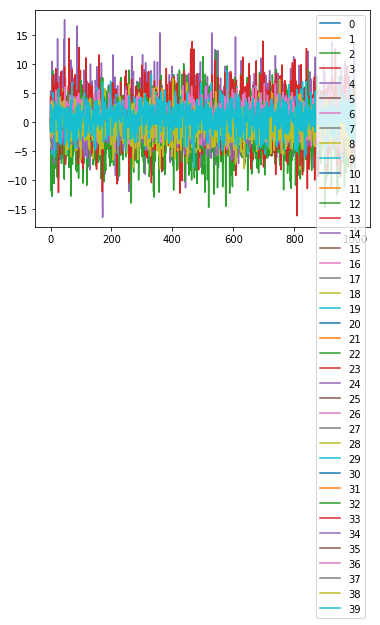

In [2]:
train_X = pd.read_csv("data/train.csv", header=None)
train_X.plot()

In [3]:
train_Y = pd.read_csv("data/trainLabels.csv", header=None)
train_Y.head()

0
0  1
1  0
2  0
3  1
4  0

In [4]:
#-----------------------Logistic Regression---------------------------------------------
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=train_X , y=train_Y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#---------------------------------------SVM -------------------------------------------------

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=train_X , y=train_Y , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


Logistic Regression:
 Accuracy: 0.82 +/- 0.0293257565972 

SVM:
 Accuracy: 0.915 +/- 0.0196214168703 



In [11]:
# Prediction

test_X = pd.read_csv("data/test.csv", header=None)
classifier.fit(train_X, train_Y)
output = classifier.predict(test_X)
print(output)
len(output)

[1 0 1 ..., 1 0 1]


9000

In [14]:
output_df = pd.DataFrame(output, columns=['Solution'])
output_df.index += 1
output_df.index.name = 'Id'
output_df.head(10)

Solution
Id          
1          1
2          0
3          1
4          0
5          0
6          0
7          0
8          1
9          0
10         0

In [15]:
output_df.to_csv('outputSVM.csv')